In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## IMAGE PREPROCESSING

In [2]:
# Our sketch generating function
def sketch(image):
    # Convert image to grayscale
    gray_sketch = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Clean up image using Guassian Blur
    blur_sketch = cv2.GaussianBlur(gray_sketch, (5,5), 0)
    
    # Extract edges
    canny_edges = cv2.Canny(blur_sketch, 20, 90)
    
    # Do an invert binarize the image 
    ret, edges = cv2.threshold(canny_edges, 70, 255, cv2.THRESH_BINARY_INV)
    return edges

## DEMO OF HOW THE LIVE SKETCH LOOKS LIKE 

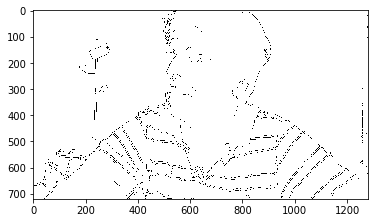

In [4]:
video= cv2.VideoCapture(0)
ret, still_frame = video.read()
plt.imshow(sketch(still_frame), cmap='gray')


## TO SEE THE SKETCH ON WEBCAM 

In [ ]:
while True:
    ret, frame = video.read()
    cv2.imshow('Our Live Sketcher', sketch(frame))
    if cv2.waitKey(1) == 13: #13 is the Enter Key
        break
        
# Release camera and close windows
video.release()
cv2.destroyAllWindows()      